Dataset

In this homework, we will use the California Housing Prices data from Kaggle.

Here's a wget-able link:

wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv

We'll keep working with the 'median_house_value' variable, and we'll transform it to a classification task.
Features

For the rest of the homework, you'll need to use only these columns:

    'latitude',
    'longitude',
    'housing_median_age',
    'total_rooms',
    'total_bedrooms',
    'population',
    'households',
    'median_income',
    'median_house_value'
    'ocean_proximity',

## Download Dataset

In [1]:
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv

# Can also be done by using 
# import wget 
# wget.download("https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv")

--2022-09-26 19:25:56--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1423529 (1.4M) [text/plain]
Saving to: 'housing.csv'

     0K .......... .......... .......... .......... ..........  3% 4.39M 0s
    50K .......... .......... .......... .......... ..........  7% 8.58M 0s
   100K .......... .......... .......... .......... .......... 10% 15.9M 0s
   150K .......... .......... .......... .......... .......... 14% 6.84M 0s
   200K .......... .......... .......... .......... .......... 17% 6.30M 0s
   250K .......... .......... .......... .......... .......... 21% 49.5M 0s
   300K .......... .......... .......... .......... .......... 25% 9.87M 0s
   350K .......... .......... ..

## Importing libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


C:\anaconda3\envs\ml-zoomcamp\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
%matplotlib inline

## Loading data into a dataframe

In [4]:
data = pd.read_csv("housing.csv")
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


## Data preparation    

- Select only the features from above and fill in the missing values with 0.

In [6]:
housing = data.fillna(0,axis=0)

In [7]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


- Create a new column rooms_per_household by dividing the column total_rooms by the column households from dataframe.

In [8]:
housing['rooms_per_household'] = housing['total_rooms'] / housing['households']  # should I use ceiling or round??
housing['rooms_per_household']

0        6.984127
1        6.238137
2        8.288136
3        5.817352
4        6.281853
           ...   
20635    5.045455
20636    6.114035
20637    5.205543
20638    5.329513
20639    5.254717
Name: rooms_per_household, Length: 20640, dtype: float64

- Create a new column bedrooms_per_room by dividing the column total_bedrooms by the column total_rooms from dataframe.

In [9]:
housing['bedrooms_per_room'] = housing['total_bedrooms'] / housing['total_rooms']
housing['bedrooms_per_room']

0        0.146591
1        0.155797
2        0.129516
3        0.184458
4        0.172096
           ...   
20635    0.224625
20636    0.215208
20637    0.215173
20638    0.219892
20639    0.221185
Name: bedrooms_per_room, Length: 20640, dtype: float64

- Create a new column population_per_household by dividing the column population by the column households from dataframe.

In [10]:
housing['population_per_household'] = housing['population'] / housing['households']
housing['population_per_household']

0        2.555556
1        2.109842
2        2.802260
3        2.547945
4        2.181467
           ...   
20635    2.560606
20636    3.122807
20637    2.325635
20638    2.123209
20639    2.616981
Name: population_per_household, Length: 20640, dtype: float64

## Question 1

What is the most frequent observation (mode) for the column ocean_proximity?

Options:

- NEAR BAY
- **<1H OCEAN**
- INLAND
- NEAR OCEAN

In [11]:
housing['ocean_proximity'].mode()

0    <1H OCEAN
Name: ocean_proximity, dtype: object

In [12]:
housing['ocean_proximity'].value_counts() #can also be used to find the most frequent observations/mode

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

## Question 2

- Create the correlation matrix for the numerical features of your train dataset.
        In a correlation matrix, you compute the correlation coefficient between every pair of features in the dataset.
- What are the two features that have the biggest correlation in this dataset?

Options:

- **total_bedrooms and households**
- total_bedrooms and total_rooms
- population and households
- population_per_household and total_rooms

In [13]:
housing.dtypes

longitude                   float64
latitude                    float64
housing_median_age          float64
total_rooms                 float64
total_bedrooms              float64
population                  float64
households                  float64
median_income               float64
median_house_value          float64
ocean_proximity              object
rooms_per_household         float64
bedrooms_per_room           float64
population_per_household    float64
dtype: object

In [14]:
num_cols = housing.select_dtypes('number').columns
num_cols

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'rooms_per_household', 'bedrooms_per_room',
       'population_per_household'],
      dtype='object')

In [15]:
corr = housing[num_cols].corr(method='pearson')
corr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
longitude,1.000000,-0.924664,-0.108197,0.044568,0.068082,0.099773,0.055310,-0.015176,-0.045967,-0.027540,0.084836,0.002476
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.065318,-0.108785,-0.071035,-0.079809,-0.144160,0.106389,-0.104112,0.002366
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.317063,-0.296244,-0.302916,-0.119034,0.105623,-0.153277,0.125396,0.013191
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.920196,0.857126,0.918484,0.198050,0.134153,0.133798,-0.174583,-0.024581
total_bedrooms,0.068082,-0.065318,-0.317063,0.920196,1.000000,0.866266,0.966507,-0.007295,0.049148,0.002717,0.122205,-0.028019
population,0.099773,-0.108785,-0.296244,0.857126,0.866266,1.000000,0.907222,0.004834,-0.024650,-0.072213,0.031397,0.069863
households,0.055310,-0.071035,-0.302916,0.918484,0.966507,0.907222,1.000000,0.013033,0.065843,-0.080598,0.059818,-0.027309
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007295,0.004834,0.013033,1.000000,0.688075,0.326895,-0.573836,0.018766
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049148,-0.024650,0.065843,0.688075,1.000000,0.151948,-0.238759,-0.023737
rooms_per_household,-0.027540,0.106389,-0.153277,0.133798,0.002717,-0.072213,-0.080598,0.326895,0.151948,1.000000,-0.387465,-0.004852


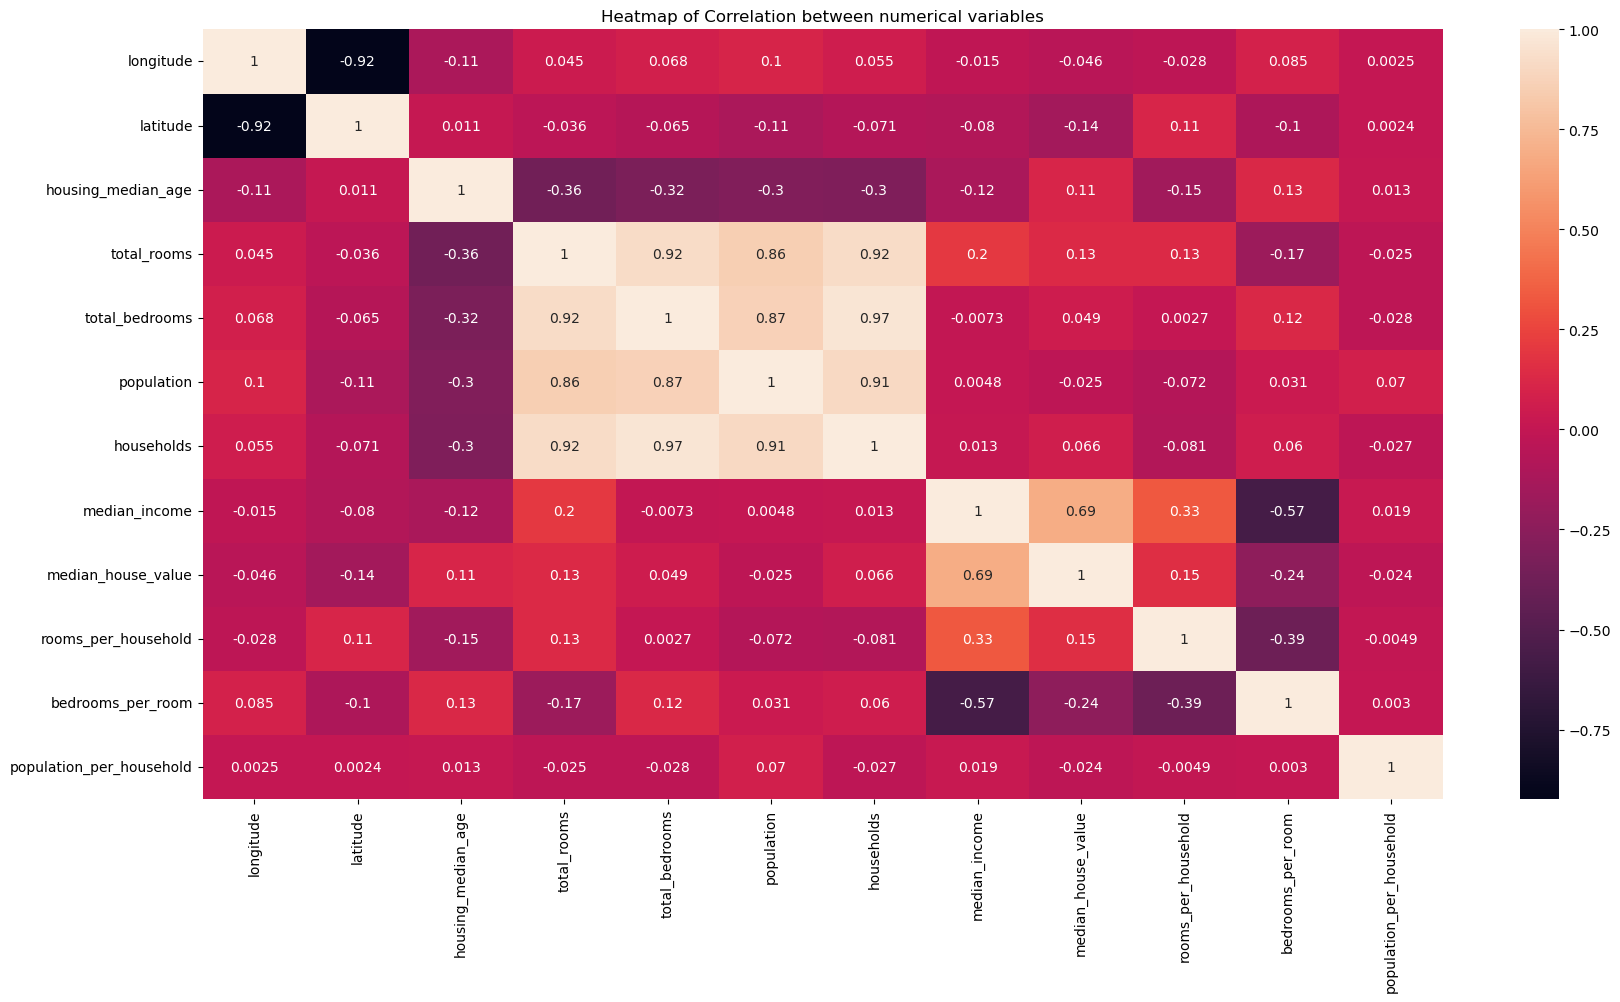

In [16]:
plt.figure(figsize= (20,10))
sns.heatmap(corr, annot = True)
plt.title('Heatmap of Correlation between numerical variables');

In [17]:
corr.unstack().sort_values(ascending = False).head(15)

longitude                 longitude                   1.000000
latitude                  latitude                    1.000000
bedrooms_per_room         bedrooms_per_room           1.000000
rooms_per_household       rooms_per_household         1.000000
median_house_value        median_house_value          1.000000
median_income             median_income               1.000000
households                households                  1.000000
population                population                  1.000000
total_bedrooms            total_bedrooms              1.000000
total_rooms               total_rooms                 1.000000
housing_median_age        housing_median_age          1.000000
population_per_household  population_per_household    1.000000
total_bedrooms            households                  0.966507
households                total_bedrooms              0.966507
total_rooms               total_bedrooms              0.920196
dtype: float64

**total_bedrooms and households have the biggest correlation in this dataset**

### Make median_house_value binary

We need to turn the median_house_value variable from numeric into binary.
Let's create a variable above_average which is **1 if the median_house_value is above its mean value and 0 otherwise.**

In [18]:
housing["above_average"] = np.where(housing["median_house_value"] > housing["median_house_value"].mean(),1,0)
    # or
# housing["above_average"] = housing["median_house_value"].apply(lambda z: 1 if z>housing["median_house_value"].mean() else 0)
    #or
# median_house_value_mean = housing["median_house_value"].mean()
# housing["above_average"] = (housing['median_house_value'] > median_house_value_mean).astype('int')

In [19]:
housing["above_average"].value_counts()

0    12255
1     8385
Name: above_average, dtype: int64

## Split the data

- Split your data in train/val/test sets, with 60%/20%/20% distribution.
      Use Scikit-Learn for that (the train_test_split function) and set the seed to 42.
      Make sure that the target value (median_house_value) is not in your dataframe.

In [20]:
import sklearn
from sklearn.model_selection import train_test_split

In [21]:
X = housing.drop(["median_house_value","above_average"], axis =1)
y = housing["above_average"]

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Train Test split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42) # Train Validation Split
#0.25 x 0.8 = 0.2

In [23]:
X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape 

((12384, 12), (4128, 12), (4128, 12), (12384,), (4128,), (4128,))

## Question 3

- Calculate the mutual information score with the (binarized) price for the categorical variable that we have. 
    Use the training set only.
- What is the value of mutual information? Round it to 2 decimal digits using round(score, 2)

Options:

- 0.263
- 0.00001
- **0.101**
- 0.15555

In [24]:
cat_cols = X_train.select_dtypes('object').columns

In [25]:
cat_cols = cat_cols[0]
cat_cols

'ocean_proximity'

In [26]:
from sklearn.metrics import mutual_info_score

round(mutual_info_score(X_train[cat_cols], y_train), 2)

0.1

In [27]:
round(mutual_info_score(X_train[cat_cols], y_train), 3)

0.101

## Question 4

- Now let's train a logistic regression
- Remember that we have one categorical variable ocean_proximity in the data. Include it using one-hot encoding.
- Fit the model on the training dataset.
- To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
        model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)
- Calculate the accuracy on the validation dataset and round it to 2 decimal digits.

Options:

- 0.60
- 0.72
- **0.84**
- 0.95

In [28]:
from sklearn.feature_extraction import DictVectorizer

dict_vectorizer = DictVectorizer(sparse = False)
dict_Xtrain = X_train.to_dict(orient='records')
dict_Xtrain = dict_vectorizer.fit_transform(dict_Xtrain)
dict_Xtrain[0]

array([ 2.59713701e-01,  3.74000000e+02,  3.90000000e+01,  3.44300000e+01,
       -1.19670000e+02,  2.36810000e+00,  1.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  1.40400000e+03,
        3.75401070e+00,  3.92245989e+00,  3.81000000e+02,  1.46700000e+03])

In [29]:
dict_vectorizer.get_feature_names_out()

array(['bedrooms_per_room', 'households', 'housing_median_age',
       'latitude', 'longitude', 'median_income',
       'ocean_proximity=<1H OCEAN', 'ocean_proximity=INLAND',
       'ocean_proximity=ISLAND', 'ocean_proximity=NEAR BAY',
       'ocean_proximity=NEAR OCEAN', 'population',
       'population_per_household', 'rooms_per_household',
       'total_bedrooms', 'total_rooms'], dtype=object)

In [30]:
dict_Xval = X_val.to_dict(orient='records')
dict_Xval = dict_vectorizer.transform(dict_Xval)
dict_Xval[0]

array([ 1.59529807e-01,  1.82000000e+02,  3.50000000e+01,  3.67400000e+01,
       -1.19850000e+02,  3.53750000e+00,  0.00000000e+00,  1.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  5.37000000e+02,
        2.95054945e+00,  6.54395604e+00,  1.90000000e+02,  1.19100000e+03])

In [31]:
dict_vectorizer.get_feature_names_out()

array(['bedrooms_per_room', 'households', 'housing_median_age',
       'latitude', 'longitude', 'median_income',
       'ocean_proximity=<1H OCEAN', 'ocean_proximity=INLAND',
       'ocean_proximity=ISLAND', 'ocean_proximity=NEAR BAY',
       'ocean_proximity=NEAR OCEAN', 'population',
       'population_per_household', 'rooms_per_household',
       'total_bedrooms', 'total_rooms'], dtype=object)

In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
log_reg =  LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)

log_reg.fit(dict_Xtrain, y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [34]:
 y_train_pred = log_reg.predict(dict_Xtrain)

In [35]:
from sklearn.metrics import accuracy_score

accuracy_train= accuracy_score(y_train, y_train_pred)

round(accuracy_train,2)

0.83

In [36]:
 y_val_pred = log_reg.predict(dict_Xval)

In [37]:
accuracy_val= accuracy_score(y_val, y_val_pred)

round(accuracy_val,2)

0.84

## Question 5

- Let's find the least useful feature using the feature elimination technique. Train a model with all these features (using the same parameters as in Q4).
- Now exclude each feature from this set and train a model without it. Record the accuracy for each model.
- For each feature, calculate the difference between the original accuracy and the accuracy without the feature.

Which of following feature has the smallest difference?
       
- **total_rooms**
- total_bedrooms
- population
- households

    note: the difference doesn't have to be positive

In [38]:
cols = X_train.drop('total_rooms', axis =1).columns.values
cols

array(['longitude', 'latitude', 'housing_median_age', 'total_bedrooms',
       'population', 'households', 'median_income', 'ocean_proximity',
       'rooms_per_household', 'bedrooms_per_room',
       'population_per_household'], dtype=object)

## Function Definitions

In [39]:
def data_prep(X_train, X_val, col):
    
    cols = X_train.drop(col, axis =1).columns.values
    
    
    from sklearn.feature_extraction import DictVectorizer

    dict_vectorizer = DictVectorizer(sparse = False)
    
    dict_Xtrain = X_train[cols].to_dict(orient='records')
    dict_Xval = X_val[cols].to_dict(orient='records')

    dict_Xtrain = dict_vectorizer.fit_transform(dict_Xtrain)
    #dict_Xtrain[0]
    
    dict_Xval = dict_vectorizer.transform(dict_Xval)
    #dict_Xval[0]
    
    return dict_Xtrain, dict_Xval

In [40]:
def model_log_regression(dict_Xtrain, y_train, dict_Xval, y_val):
    
    from sklearn.linear_model import LogisticRegression
    
    log_reg =  LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)
    model = log_reg.fit(dict_Xtrain, y_train)
    
    y_train_pred = log_reg.predict(dict_Xtrain)
    train_accuracy= accuracy_score(y_train, y_train_pred)
        
    y_val_pred = log_reg.predict(dict_Xval)
    val_accuracy= accuracy_score(y_val, y_val_pred)
    
    return  train_accuracy,val_accuracy

## Train Model

In [41]:
train_accuracy = []
val_accuracy = []
diff_val_accuracy = []
col_removed =[]

for col in X_train:
    
    Xtrain, Xval =  data_prep(X_train, X_val, col)
    acc_train, acc_val = model_log_regression(Xtrain, y_train, Xval, y_val)
    
    col_removed.append(col)
    train_accuracy.append(acc_train)
    val_accuracy.append(acc_val)
    diff_val_accuracy.append(abs(accuracy_val - acc_val))
    

## Dataframe for columns removed and accuracy

In [42]:
feature_acc = dict()
feature_acc['column_removed'] = col_removed
feature_acc['train_accuracy'] = train_accuracy
feature_acc['val_accuracy'] = val_accuracy
feature_acc['diff_val_accuracy'] = diff_val_accuracy

In [43]:
df = pd.DataFrame(feature_acc)
df

,column_removed,train_accuracy,val_accuracy,diff_val_accuracy
0,longitude,0.823724,0.831880,0.004118
1,latitude,0.830184,0.832364,0.003634
2,housing_median_age,0.825016,0.831638,0.004360
3,total_rooms,0.830346,0.836240,0.000242
4,total_bedrooms,0.828488,0.837209,0.001211
5,population,0.821140,0.826308,0.009690
6,households,0.830265,0.834060,0.001938
7,median_income,0.779070,0.785368,0.050630
8,ocean_proximity,0.813146,0.820252,0.015746
9,rooms_per_household,0.829377,0.835271,0.000727


## Question 6

- For this question, we'll see how to use a linear regression model from Scikit-Learn
- We'll need to use the original column 'median_house_value'. Apply the logarithmic transformation to this column.
- Fit the Ridge regression model (model = Ridge(alpha=a, solver="sag", random_state=42)) on the training data. 
- This model has a parameter alpha. Let's try the following values: [0, 0.01, 0.1, 1, 10].
- Which of these alphas leads to the best RMSE on the validation set? Round your RMSE scores to 3 decimal digits.

If there are multiple options, select the smallest alpha.

Options:

- **0**
- 0.01
- 0.1
- 1
- 10  
  
  

In [44]:
import sklearn
from sklearn.model_selection import train_test_split

In [45]:
X = housing.drop(["median_house_value","above_average"], axis =1)
y = np.log1p(housing["median_house_value"])

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Train Test split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42) # Train Validation Split
#0.25 x 0.8 = 0.2

## Function Definitions

In [47]:
def data_prep(X_train, X_val):
    
    from sklearn.feature_extraction import DictVectorizer

    dict_vectorizer = DictVectorizer(sparse = False)
    
    dict_Xtrain = X_train.to_dict(orient='records')
    dict_Xval = X_val.to_dict(orient='records')

    dict_Xtrain = dict_vectorizer.fit_transform(dict_Xtrain)    
    dict_Xval = dict_vectorizer.transform(dict_Xval)
    
    return dict_Xtrain, dict_Xval

In [48]:
def RMSE(ypred, ytrain):
    
    from sklearn.metrics import mean_squared_error
    
    return np.sqrt(mean_squared_error(ypred, ytrain))

In [49]:
def model(a, Xtrain, ytrain, Xval, yval):
    from sklearn.linear_model import Ridge
    ridge = Ridge(alpha=a, solver="sag", random_state=42)
    model = ridge.fit(Xtrain, ytrain)
    
    ytrain_pred = model.predict(Xtrain)
    print("Train RMSE: ", round(RMSE(ytrain_pred, ytrain), 3))
    
    yval_pred = model.predict(Xval)
    print("Val RMSE: ", RMSE(yval_pred, yval))
    print("Val RMSE - Rounded to 3 decimal places: ", round(RMSE(yval_pred, yval), 3))
    
    print()


In [50]:
for a in [0, 0.01, 0.1, 1, 10]:
    
    print("Alpha(a) :", a )

    Xtrain, Xval = data_prep(X_train, X_val)
    
    model(a, Xtrain, y_train, Xval, y_val)
    
    
    

Alpha(a) : 0
Train RMSE:  0.524
Val RMSE:  0.524063570701514
Val RMSE - Rounded to 3 decimal places:  0.524

Alpha(a) : 0.01
Train RMSE:  0.524
Val RMSE:  0.524063570718629
Val RMSE - Rounded to 3 decimal places:  0.524

Alpha(a) : 0.1
Train RMSE:  0.524
Val RMSE:  0.5240635708812071
Val RMSE - Rounded to 3 decimal places:  0.524

Alpha(a) : 1
Train RMSE:  0.524
Val RMSE:  0.5240635725155536
Val RMSE - Rounded to 3 decimal places:  0.524

Alpha(a) : 10
Train RMSE:  0.524
Val RMSE:  0.5240635888333284
Val RMSE - Rounded to 3 decimal places:  0.524



**Which of these alphas leads to the best RMSE on the validation set?**

**Alpha or a = 0**